In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive .mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/dengue.csv")
data.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [ ]:
# Data Exploration
print(data.head())
print(data.info())
print(data.describe())

   Gender  Age  NS1  IgG  IgM        Area     AreaType HouseType District  \
0  Female   45    0    0    0      Mirpur  Undeveloped  Building    Dhaka   
1    Male   17    0    0    1  Chawkbazar    Developed  Building    Dhaka   
2  Female   29    0    0    0      Paltan  Undeveloped     Other    Dhaka   
3  Female   63    1    1    0   Motijheel    Developed     Other    Dhaka   
4    Male   22    0    0    0    Gendaria  Undeveloped  Building    Dhaka   

   Outcome  
0        0  
1        0  
2        0  
3        1  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7

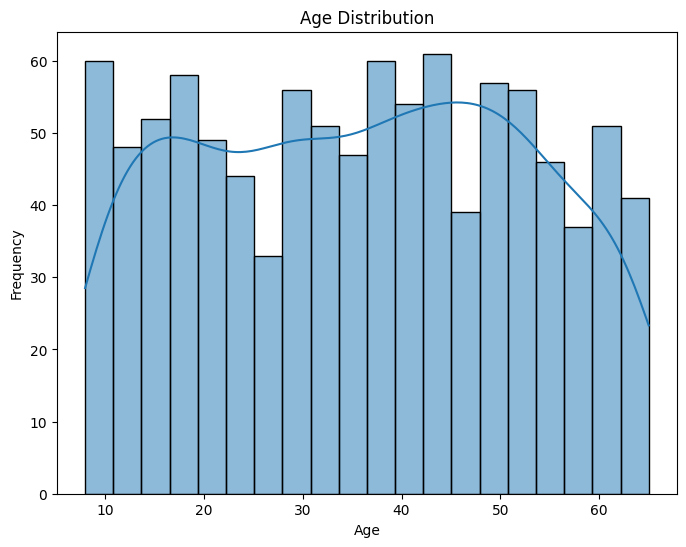

In [ ]:
# Replace infinite values with NaN in a way that doesn't trigger chained assignment warning
data.loc[:, 'Age'] = data['Age'].replace([np.inf, -np.inf], np.nan)

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

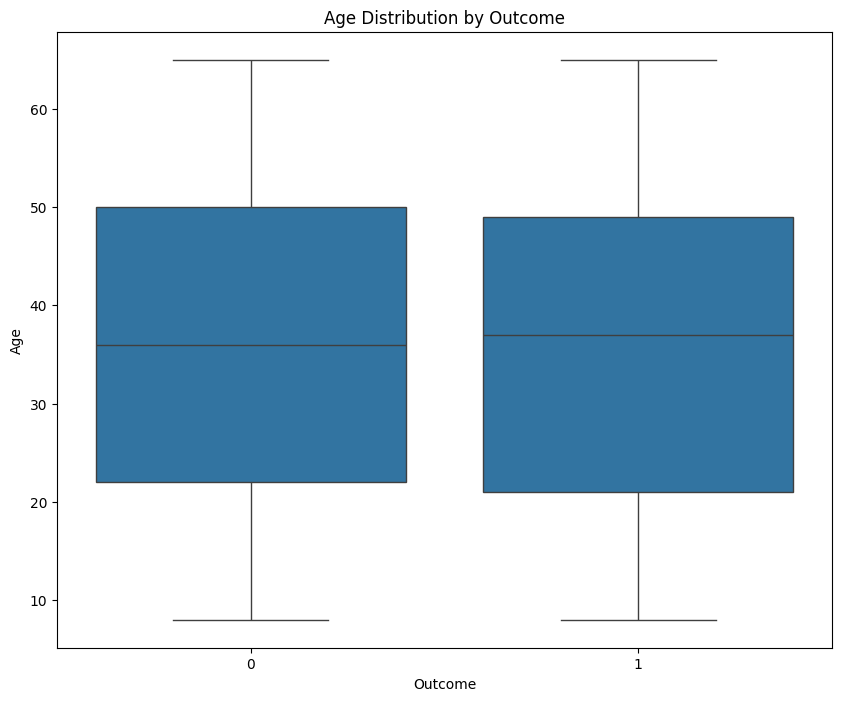

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Outcome', y='Age', data=data)
plt.title('Age Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

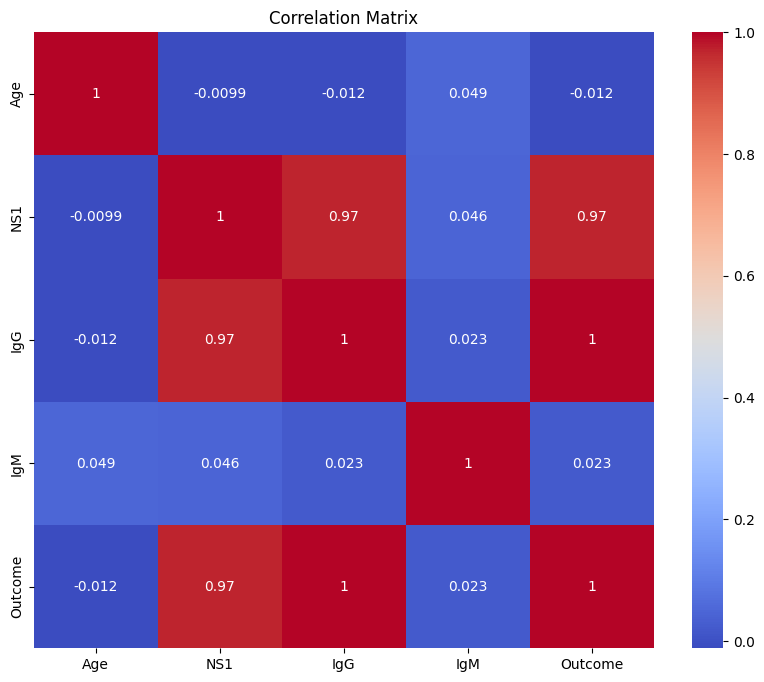

In [ ]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=np.number)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
 #Step 5: Statistical Analysis

from scipy.stats import ttest_ind

positive_cases = data[data['Outcome'] == 1]
negative_cases = data[data['Outcome'] == 0]

t_stat, p_value = ttest_ind(positive_cases['Age'], negative_cases['Age'])
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -0.3712182983470451, P-Value: 0.7105537334584301


In [ ]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Area'] = label_encoder.fit_transform(data['Area'])
data['AreaType'] = label_encoder.fit_transform(data['AreaType'])
data['HouseType'] = label_encoder.fit_transform(data['HouseType'])

In [ ]:
data.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,0,45,0,0,0,22,1,0,Dhaka,0
1,1,17,0,0,1,7,0,0,Dhaka,0
2,0,29,0,0,0,27,1,1,Dhaka,0
3,0,63,1,1,0,24,0,1,Dhaka,1
4,1,22,0,0,0,10,1,0,Dhaka,0


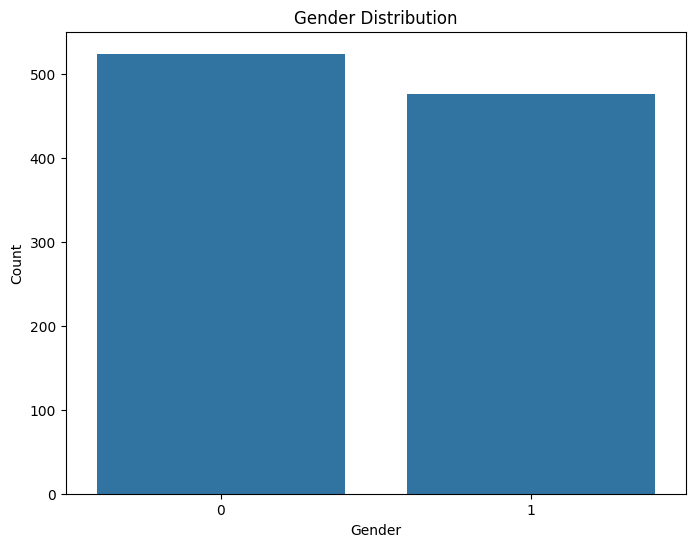

In [ ]:
# Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Define features and target
X = data[['Gender','Area', 'AreaType', 'HouseType', 'NS1', 'IgG', 'IgM']]
y = data['Outcome']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

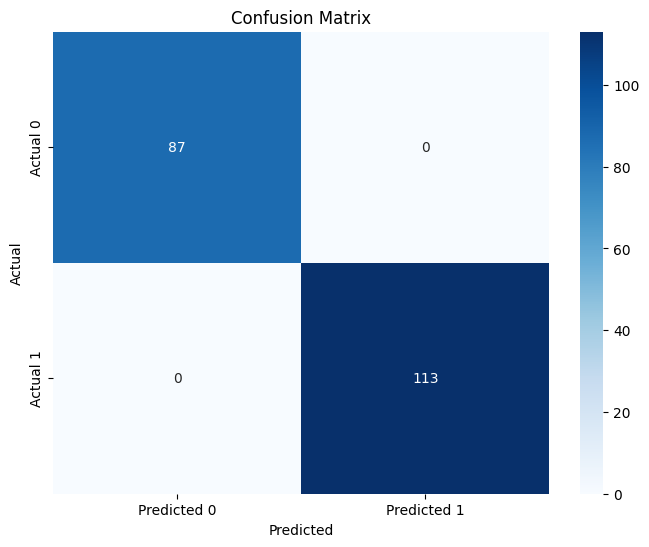

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
# Calculate the recall score
recall = recall_score(y_test, y_pred)
y_true=y_test

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
